In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
#Importing the data
orders=pd.read_csv('orders.csv')
order_products__train=pd.read_csv('order_products__train.csv')
aisles=pd.read_csv('aisles.csv')
departments=pd.read_csv('departments.csv')
products=pd.read_csv('products.csv')
order_products__prior=pd.read_csv('order_products__prior.csv')

In [3]:
orders.sort_values('order_id',ascending=True)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0
...,...,...,...,...,...,...,...
1809968,3421079,108687,prior,6,1,13,0.0
877324,3421080,52726,prior,2,1,11,2.0
1949724,3421081,117076,prior,1,3,11,NaN
2903252,3421082,175185,prior,23,2,18,4.0


In [17]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [16]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [25]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [18]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [77]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
order_products__prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [205]:
del(df2)

In [8]:
df2

,department_id,department,product_id,product_name,aisle_id,aisle
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals
1,1,frozen,30,"Three Cheese Ziti, Marinara with Meatballs",38,frozen meals
2,1,frozen,36,Traditional Lasagna with Meat Sauce Savory Ita...,38,frozen meals
3,1,frozen,81,Blakes Chicken Parmesan Dinner,38,frozen meals
4,1,frozen,100,Peanut Butter & Strawberry Jam Sandwich,38,frozen meals
...,...,...,...,...,...,...
49683,21,missing,49553,Organic Plain Skyr,100,missing
49684,21,missing,49575,Chocolate Vanilla Malt Custard,100,missing
49685,21,missing,49641,"8\"" Pecan Pie",100,missing
49686,21,missing,49664,Lemon Cayenne Drinking Vinegar,100,missing


In [9]:
df3

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [3]:
#Merging all the tables
df3=pd.concat([order_products__train,order_products__prior],axis=0)
final_data=pd.merge(orders,df3,on='order_id')
final1=pd.merge(final_data,products,on='product_id')
final2=pd.merge(final1,aisles,on='aisle_id')
data=pd.merge(final2,departments,on='department_id')

In [4]:
data.to_csv('data.csv')

In [78]:
dataframes=[orders,order_products__train,aisles,departments,products,order_products__prior]
for i in (dataframes):
    print(i.info())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB
None


<class 'pandas.core.frame.DataFrame'>


In [79]:
for i in dataframes:
    print(i)

         order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2398795        1    prior             2          3   
2          473747        1    prior             3          3   
3         2254736        1    prior             4          4   
4          431534        1    prior             5          4   
...           ...      ...      ...           ...        ...   
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  
0                        8                     NaN  
1                        7                    15.0  
2                       12                    21.0  
3                  

# Checking for missing values

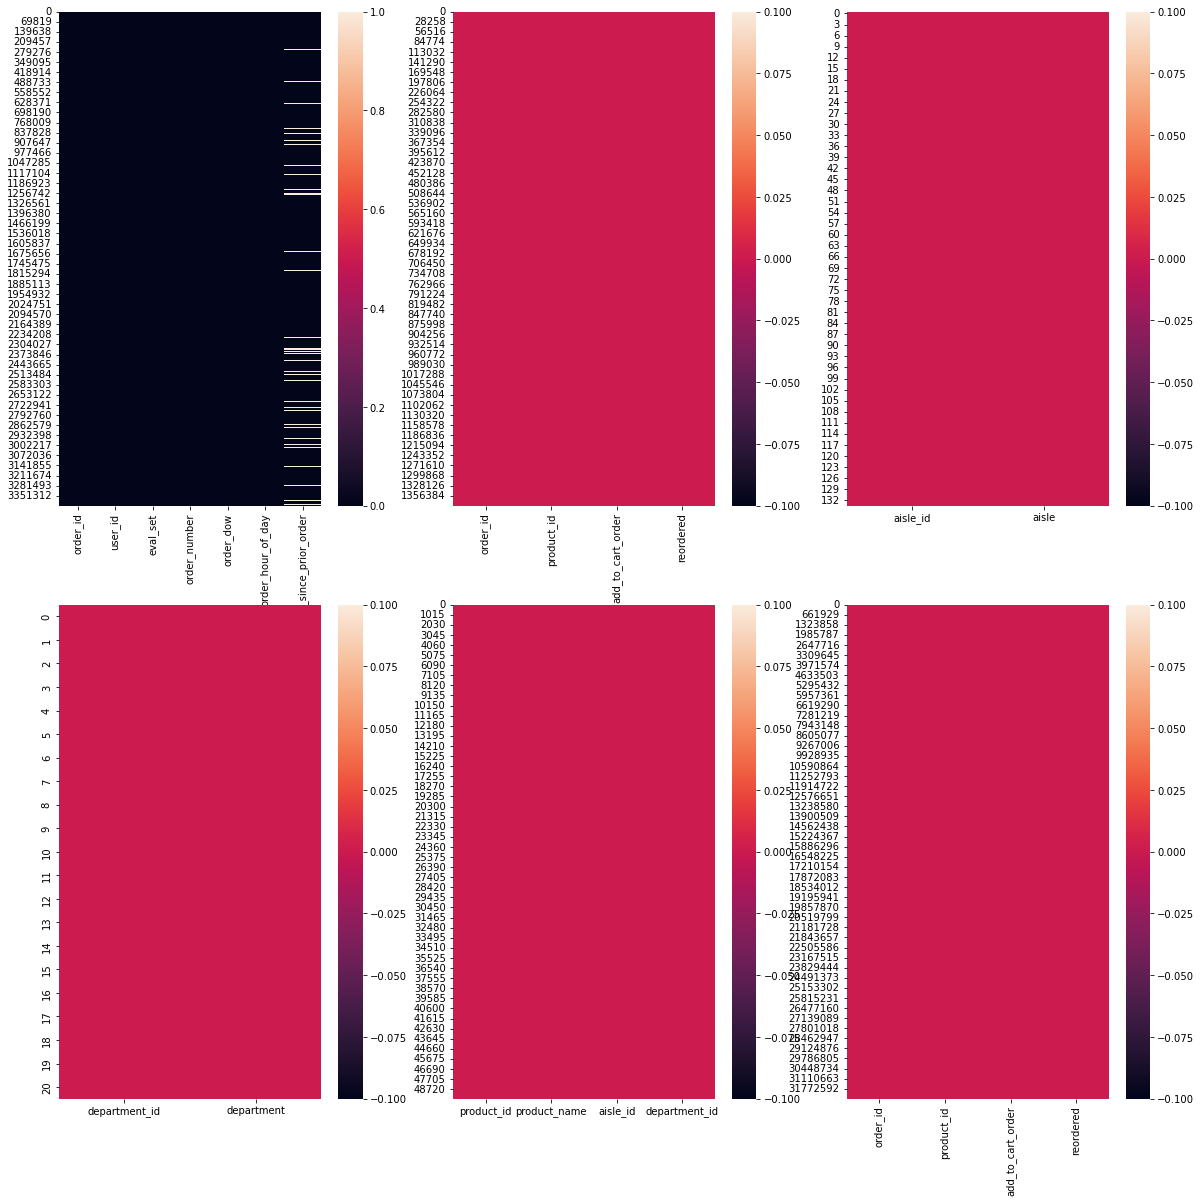

In [80]:
fig=plt.figure(figsize=(20,20))
j=1
for i in (dataframes):
    plt.subplot(2,3,j)
    sns.heatmap(i.isnull())
    j=j+1

In [81]:
for i in dataframes:
    print(i.isnull().sum())
    print('\n')

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


aisle_id    0
aisle       0
dtype: int64


department_id    0
department       0
dtype: int64


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64




In [63]:
percent_missing=print((orders['days_since_prior_order'].isnull().sum()/len(orders))*100)
#In order table we are having 6% of missing values

6.027594185817766


In [75]:
len(orders)

3421083

# Checking for duplicates

In [72]:
for i in dataframes:
    print(i.duplicated().sum())
    print('\n')
#We dont have any duplicate records

0


0


0


0


0




D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_hour_of_day', ylabel='count'>

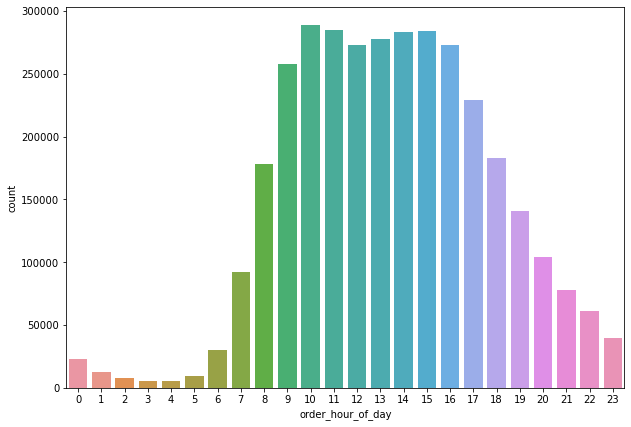

In [91]:
#To understand when do people order the most
plt.figure(figsize=(10,7))
sns.countplot('order_hour_of_day',data=orders)
#From the plot we can infer that its between 10 am and 4 pm we have the highest active time for ordering and with the
#highest orders recorded during 10th hour of the day

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_since_prior_order', ylabel='count'>

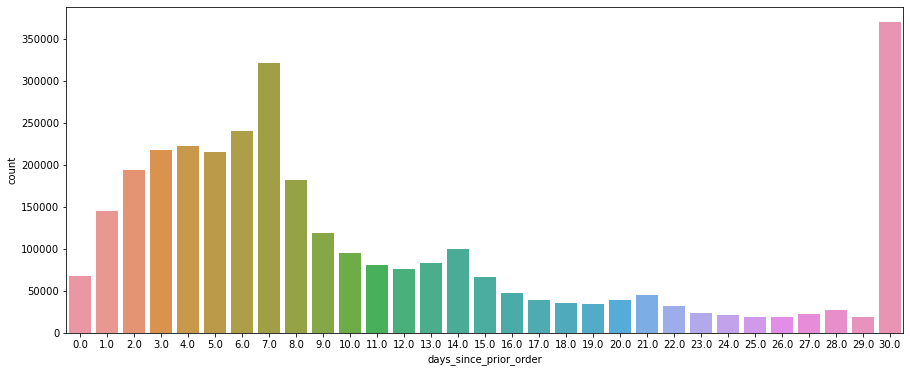

In [99]:
#Re-order rate
plt.figure(figsize=(15,6))
sns.countplot('days_since_prior_order',data=orders)
#From this plot we can infer that most of the people order only once in 30 days and followed by people comes to re order in 7days

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reordered', ylabel='count'>

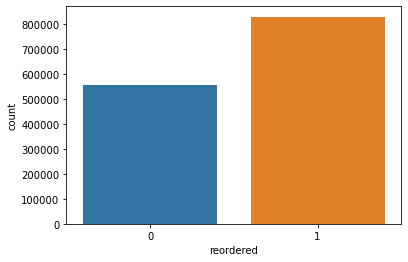

In [107]:
#reorder rate of same item
sns.countplot('reordered',data=order_products__train)

In [108]:
df1=pd.merge(order_products__train,products,on='product_id',how='left')

In [109]:
df1

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13


In [127]:
count=df1.groupby('product_name').count().reset_index().sort_values('product_name',ascending=False)

In [138]:
df1['no_of_purchase']=df1.groupby('product_id')['product_id'].transform('count') 

In [163]:
top20=df1.sort_values('no_of_purchase',ascending=False)

In [164]:
top_products=top20.drop(['order_id','add_to_cart_order'],axis=1).drop_duplicates().reset_index(drop=True)

In [165]:
#Top 20 products based on popularity
t20=top_products.head(20)

In [168]:
r10=t20[t20['reordered']==1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Banana'),
  Text(1, 0, 'Bag of Organic Bananas'),
  Text(2, 0, 'Organic Strawberries'),
  Text(3, 0, 'Organic Baby Spinach'),
  Text(4, 0, 'Large Lemon'),
  Text(5, 0, 'Organic Avocado'),
  Text(6, 0, 'Organic Hass Avocado'),
  Text(7, 0, 'Strawberries'),
  Text(8, 0, 'Limes'),
  Text(9, 0, 'Organic Raspberries'),
  Text(10, 0, 'Organic Blueberries'),
  Text(11, 0, 'Organic Whole Milk'),
  Text(12, 0, 'Organic Cucumber'),
  Text(13, 0, 'Organic Zucchini'),
  Text(14, 0, 'Organic Yellow Onion'),
  Text(15, 0, 'Organic Garlic'),
  Text(16, 0, 'Seedless Red Grapes'),
  Text(17, 0, 'Asparagus'),
  Text(18, 0, 'Organic Grape Tomatoes'),
  Text(19, 0, 'Organic Red Onion')])

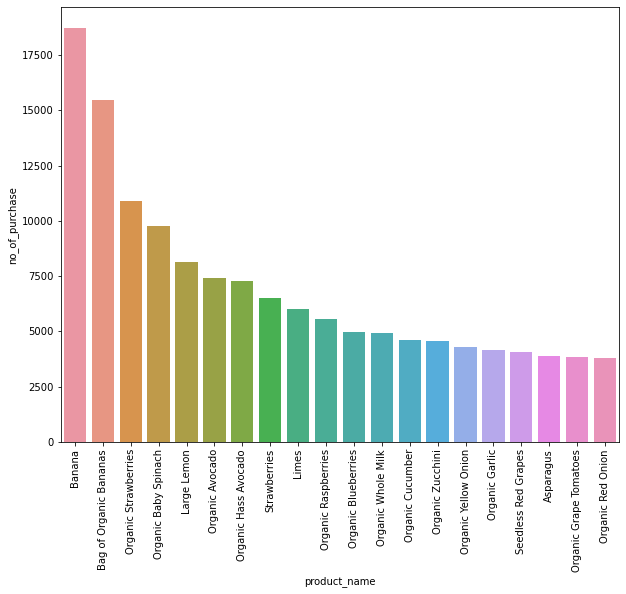

In [161]:
#most commonly order 20 items
plt.figure(figsize=(10,8))
sns.barplot(x='product_name',y='no_of_purchase',data=t20)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Banana'),
  Text(1, 0, 'Bag of Organic Bananas'),
  Text(2, 0, 'Organic Strawberries'),
  Text(3, 0, 'Organic Baby Spinach'),
  Text(4, 0, 'Large Lemon'),
  Text(5, 0, 'Organic Avocado'),
  Text(6, 0, 'Organic Hass Avocado'),
  Text(7, 0, 'Strawberries'),
  Text(8, 0, 'Limes'),
  Text(9, 0, 'Organic Raspberries')])

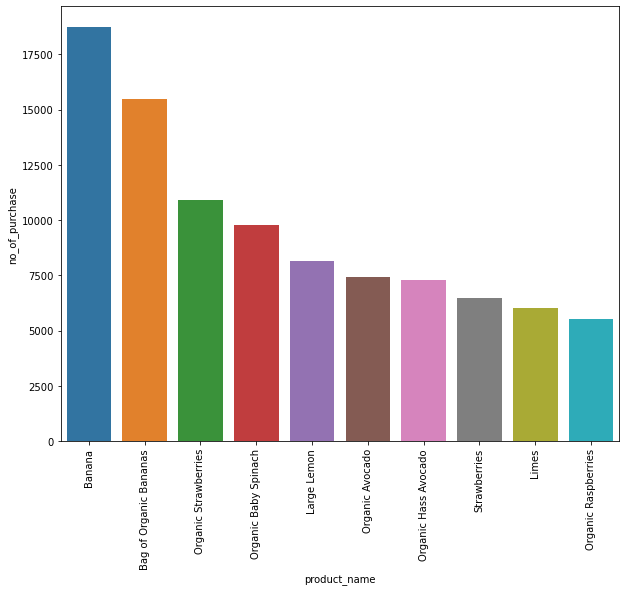

In [170]:
#most re-ordered items
plt.figure(figsize=(10,8))
sns.barplot(x='product_name',y='no_of_purchase',data=r10)
plt.xticks(rotation=90)

In [176]:
top_20_dep=pd.merge(top_products,departments,on='department_id')

In [178]:
#Here from the table we can understand that the top 
top_20_dep.drop_duplicates(inplace=True)

In [183]:
top_department=top_20_dep.groupby(['department']).sum('no_of_purchase').sort_values('no_of_purchase',ascending=False)

In [184]:
top_department

,product_id,reordered,aisle_id,department_id,no_of_purchase
department,,,,,
produce,69156508,1334,225395,11248,817638
dairy eggs,136112024,2712,389948,87392,432929
snacks,216112576,4177,544533,162925,235242
beverages,147288466,2973,431636,42098,226302
frozen,150817644,2983,377027,6098,199568
pantry,163787918,2711,435519,84461,158548
bakery,59068551,1139,203158,7002,96218
canned goods,70866985,1387,225724,44070,92692
deli,48515650,966,97991,39400,88087


<AxesSubplot:xlabel='department', ylabel='no_of_purchase'>

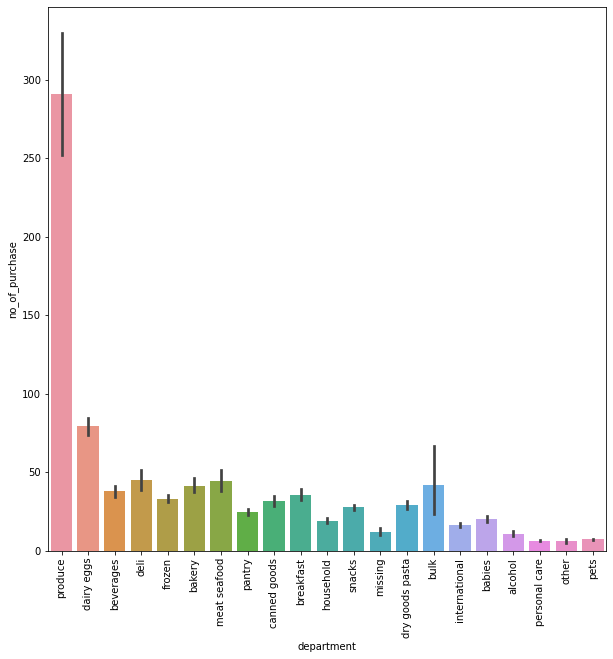

In [189]:
#From this plot we can infer that the most moving products are from produce department and the least is from others
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x='department',y='no_of_purchase',data=top_20_dep)

# Performing EDA in final data set

In [26]:
data.isnull().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

In [48]:
2078068/len(data)*100

6.546944053940516

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  department              object 
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


In [32]:
del(data)

In [33]:
data=pd.read_csv('data.csv')

In [34]:
data.dropna(inplace=True)

In [35]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [36]:
data.reset_index(inplace=True)

In [12]:
#data.duplicated().sum()

0

In [42]:
data['order_id'].max()

3421083

In [ ]:
32767

In [ ]:
2147483647
#order number,hour of the day,add to cart,reorder,aisle_id,department id 16

In [3]:
data=pd.read_csv('final_data.csv')

In [3]:
def optimise_data(data):    
    #Optimizing the memory use by down sizing the data types to the requirements
    data['order_id']=data['order_id'].astype('int32')
    data['user_id']=data['user_id'].astype('int32')
    data['order_number']=data['order_number'].astype('int16')
    data['order_dow']=data['order_dow'].astype('int16')
    data['order_hour_of_day']=data['order_hour_of_day'].astype('int16')
    data['days_since_prior_order']=data['days_since_prior_order'].astype('int16')
    data['product_id']=data['product_id'].astype('int32')
    data['add_to_cart_order']=data['add_to_cart_order'].astype('int16')
    data['reordered']=data['reordered'].astype('int16')
    data['aisle_id']=data['aisle_id'].astype('int16')
    data['department_id']=data['department_id'].astype('int16')
    data.drop(['Unnamed: 0','index'],axis=1,inplace=True)    
    return data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31741038 entries, 0 to 31741037
Data columns (total 17 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Unnamed: 0              int64 
 1   index                   int64 
 2   order_id                int32 
 3   user_id                 int32 
 4   eval_set                object
 5   order_number            int16 
 6   order_dow               int16 
 7   order_hour_of_day       int16 
 8   days_since_prior_order  int16 
 9   product_id              int32 
 10  add_to_cart_order       int16 
 11  reordered               int16 
 12  product_name            object
 13  aisle_id                int16 
 14  department_id           int16 
 15  aisle                   object
 16  department              object
dtypes: int16(8), int32(3), int64(2), object(4)
memory usage: 2.2+ GB


In [40]:
data.isnull().sum()

index                     0
order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
dtype: int64

In [49]:
#Checking for duplicate values
data.duplicated().sum()

0

In [7]:
data.drop(['Unnamed: 0','index'],axis=1,inplace=True)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_since_prior_order', ylabel='count'>

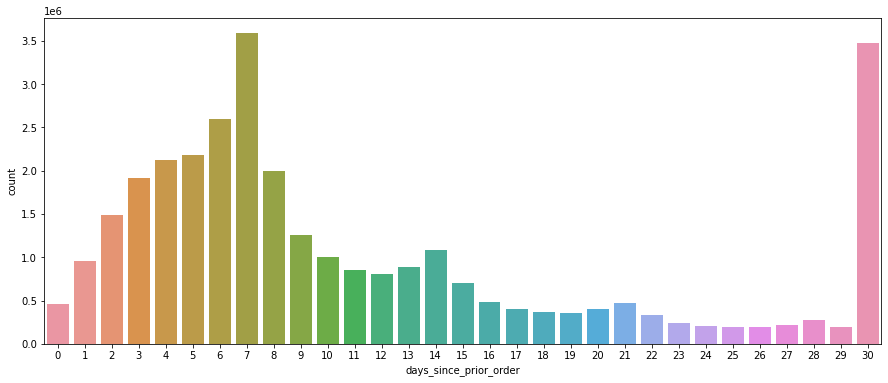

In [10]:
#Re-order rate
plt.figure(figsize=(15,6))
sns.countplot('days_since_prior_order',data=data)
#From this plot we can infer that most of the people order only once in 30 days and followed by people comes to re order in 7days

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_dow', ylabel='count'>

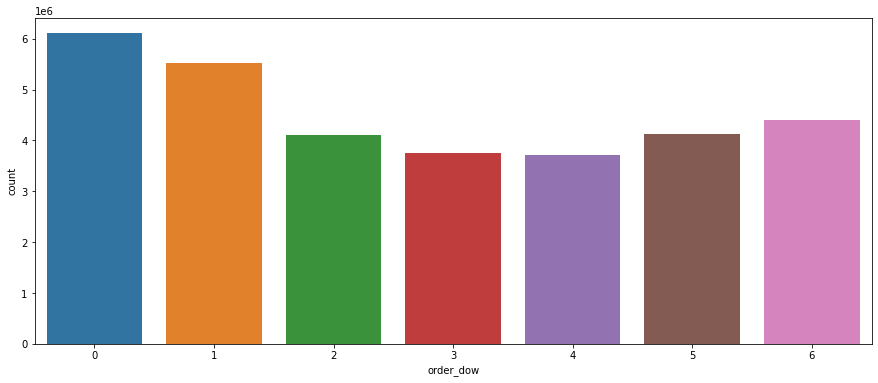

In [11]:
#Date of weak 
plt.figure(figsize=(15,6))
sns.countplot('order_dow',data=data)
#This plot tells us that the sales are high during the weekends and least during the middle week days

In [14]:
data['no_of_purchase']=data.groupby('product_id')['product_id'].transform('count') 

In [18]:
temp=data.sort_values('no_of_purchase',ascending=False)

In [22]:
top_dep=temp[['product_name','aisle','department','no_of_purchase']]

In [25]:
top_dep.drop_duplicates(inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_5956\84611799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_dep.drop_duplicates(inplace=True)


In [31]:
top_pro=top_dep.head(20)

<AxesSubplot:xlabel='product_name', ylabel='no_of_purchase'>

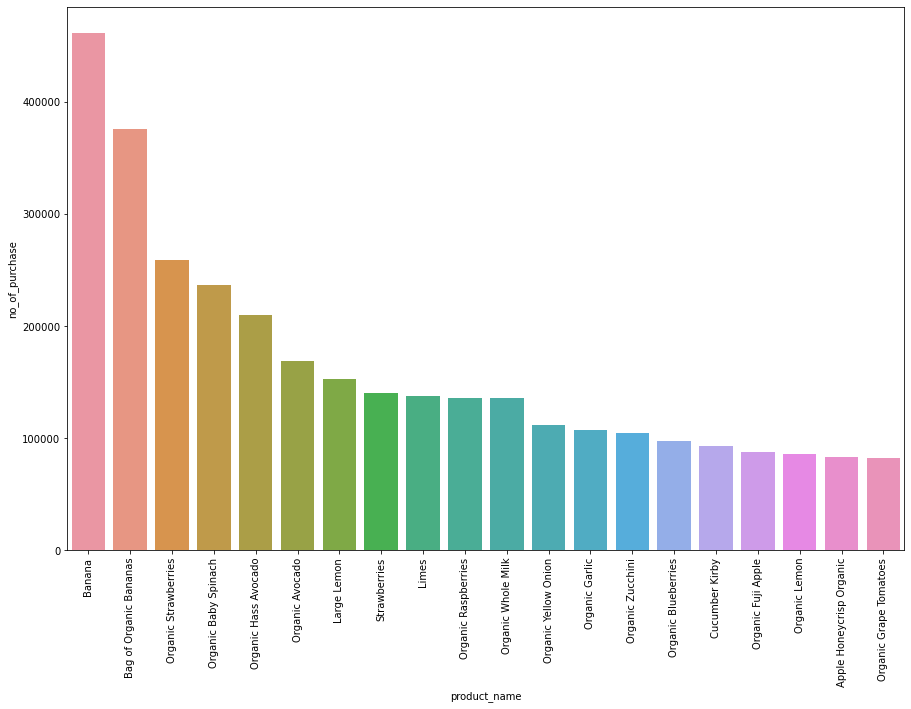

In [30]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x='product_name',y='no_of_purchase',data=top_pro)

<AxesSubplot:xlabel='department', ylabel='no_of_purchase'>

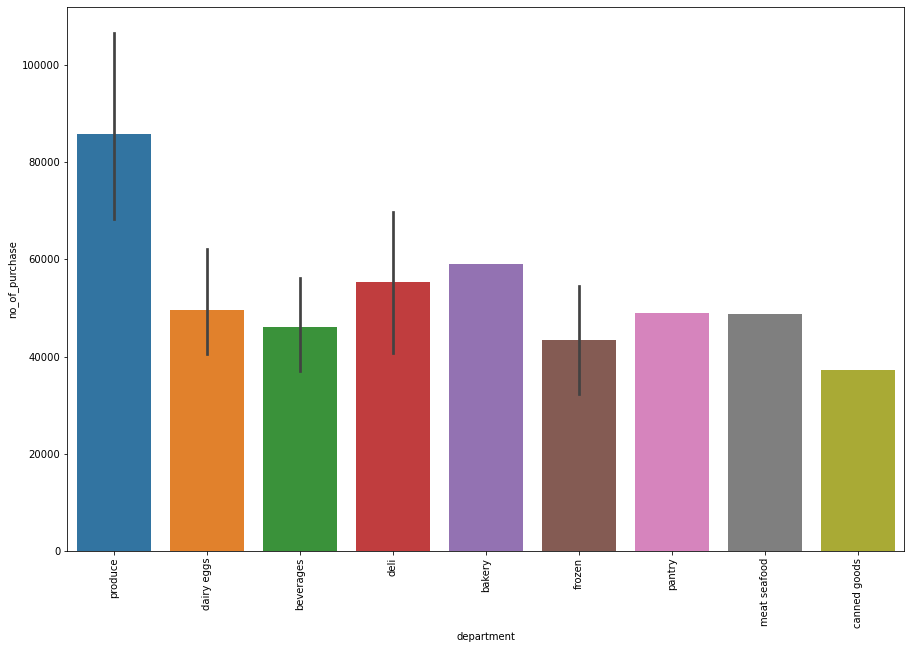

In [36]:
#Department wise number of purchase
top_dep=top_dep.head(100)
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x='department',y='no_of_purchase',data=top_dep)

In [38]:
top_dep.head()

,product_name,aisle,department,no_of_purchase
12577884,Banana,fresh fruits,produce,461757
11600973,Bag of Organic Bananas,fresh fruits,produce,375772
13511509,Organic Strawberries,fresh fruits,produce,259113
15342794,Organic Baby Spinach,packaged vegetables fruits,produce,236757
12914281,Organic Hass Avocado,fresh fruits,produce,209771


<AxesSubplot:xlabel='aisle', ylabel='no_of_purchase'>

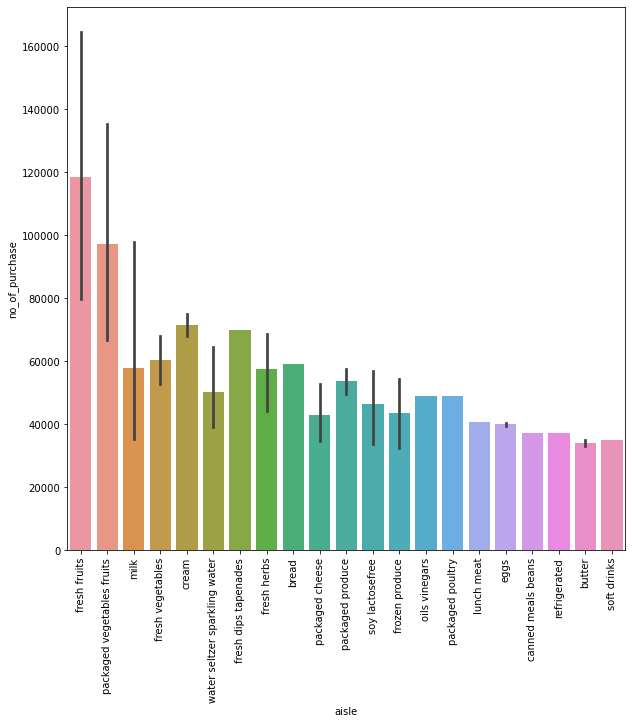

In [44]:
#This plot gives us information regarding Most busy aisle in the supermarket/store
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x='aisle',y='no_of_purchase',data=top_dep)

# Outliers

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31741038 entries, 0 to 31741037
Data columns (total 16 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int32 
 1   user_id                 int32 
 2   eval_set                object
 3   order_number            int16 
 4   order_dow               int16 
 5   order_hour_of_day       int16 
 6   days_since_prior_order  int16 
 7   product_id              int32 
 8   add_to_cart_order       int16 
 9   reordered               int16 
 10  product_name            object
 11  aisle_id                int16 
 12  department_id           int16 
 13  aisle                   object
 14  department              object
 15  no_of_purchase          int64 
dtypes: int16(8), int32(3), int64(1), object(4)
memory usage: 2.0+ GB


In [9]:
data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2398795,1,prior,2,3,7,15,196,1,1,Soda,77,7,soft drinks,beverages
1,473747,1,prior,3,3,12,21,196,1,1,Soda,77,7,soft drinks,beverages
2,2254736,1,prior,4,4,7,29,196,1,1,Soda,77,7,soft drinks,beverages
3,431534,1,prior,5,4,15,28,196,1,1,Soda,77,7,soft drinks,beverages
4,3367565,1,prior,6,2,7,19,196,1,1,Soda,77,7,soft drinks,beverages


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='count'>

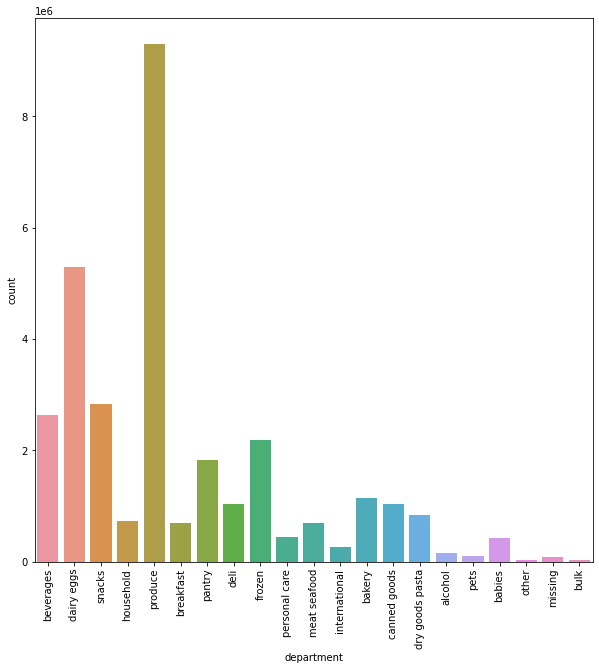

In [20]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(data['department'])

# Feature engineering 

In [4]:
data=optimise_data(data)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31741038 entries, 0 to 31741037
Data columns (total 15 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int32 
 1   user_id                 int32 
 2   eval_set                object
 3   order_number            int16 
 4   order_dow               int16 
 5   order_hour_of_day       int16 
 6   days_since_prior_order  int16 
 7   product_id              int32 
 8   add_to_cart_order       int16 
 9   reordered               int16 
 10  product_name            object
 11  aisle_id                int16 
 12  department_id           int16 
 13  aisle                   object
 14  department              object
dtypes: int16(8), int32(3), object(4)
memory usage: 1.8+ GB


In [9]:
data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2398795,1,prior,2,3,7,15,196,1,1,Soda,77,7,soft drinks,beverages
1,473747,1,prior,3,3,12,21,196,1,1,Soda,77,7,soft drinks,beverages
2,2254736,1,prior,4,4,7,29,196,1,1,Soda,77,7,soft drinks,beverages
3,431534,1,prior,5,4,15,28,196,1,1,Soda,77,7,soft drinks,beverages
4,3367565,1,prior,6,2,7,19,196,1,1,Soda,77,7,soft drinks,beverages


In [10]:
#Orders made by each users

In [17]:
user_orders=data.groupby(['user_id'])['order_id'].agg(lambda x: len(x.unique())).reset_index(name='no_of_order').set_index('user_id')

In [25]:
#From this output we can see that min number of order a user has made is 2 
print('Min no of orders',user_orders['no_of_order'].min())
print('Max no of orders',user_orders['no_of_order'].max())

Min no of orders 2
Max no of orders 99


<AxesSubplot:xlabel='no_of_order', ylabel='Count'>

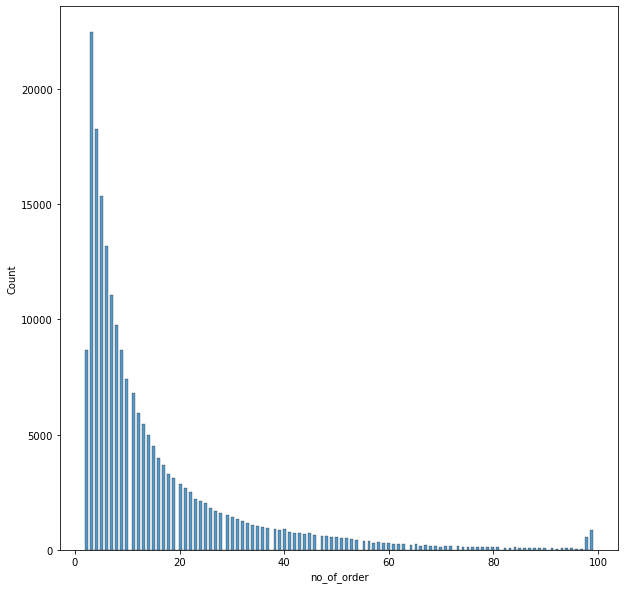

In [27]:
plt.figure(figsize=(10,10))
sns.histplot(user_orders['no_of_order'])
#Here from the plot we can say that most of the users have number of orders less than 10 

<AxesSubplot:xlabel='order_number', ylabel='days_since_prior_order'>

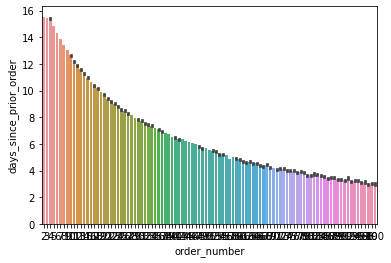

In [33]:
sns.barplot(x='order_number',y='days_since_prior_order',data=data)

In [37]:
dd1=data.pivot_table(index='order_dow',columns='order_hour_of_day',values='order_number',aggfunc='sum')

<AxesSubplot:xlabel='order_hour_of_day', ylabel='order_dow'>

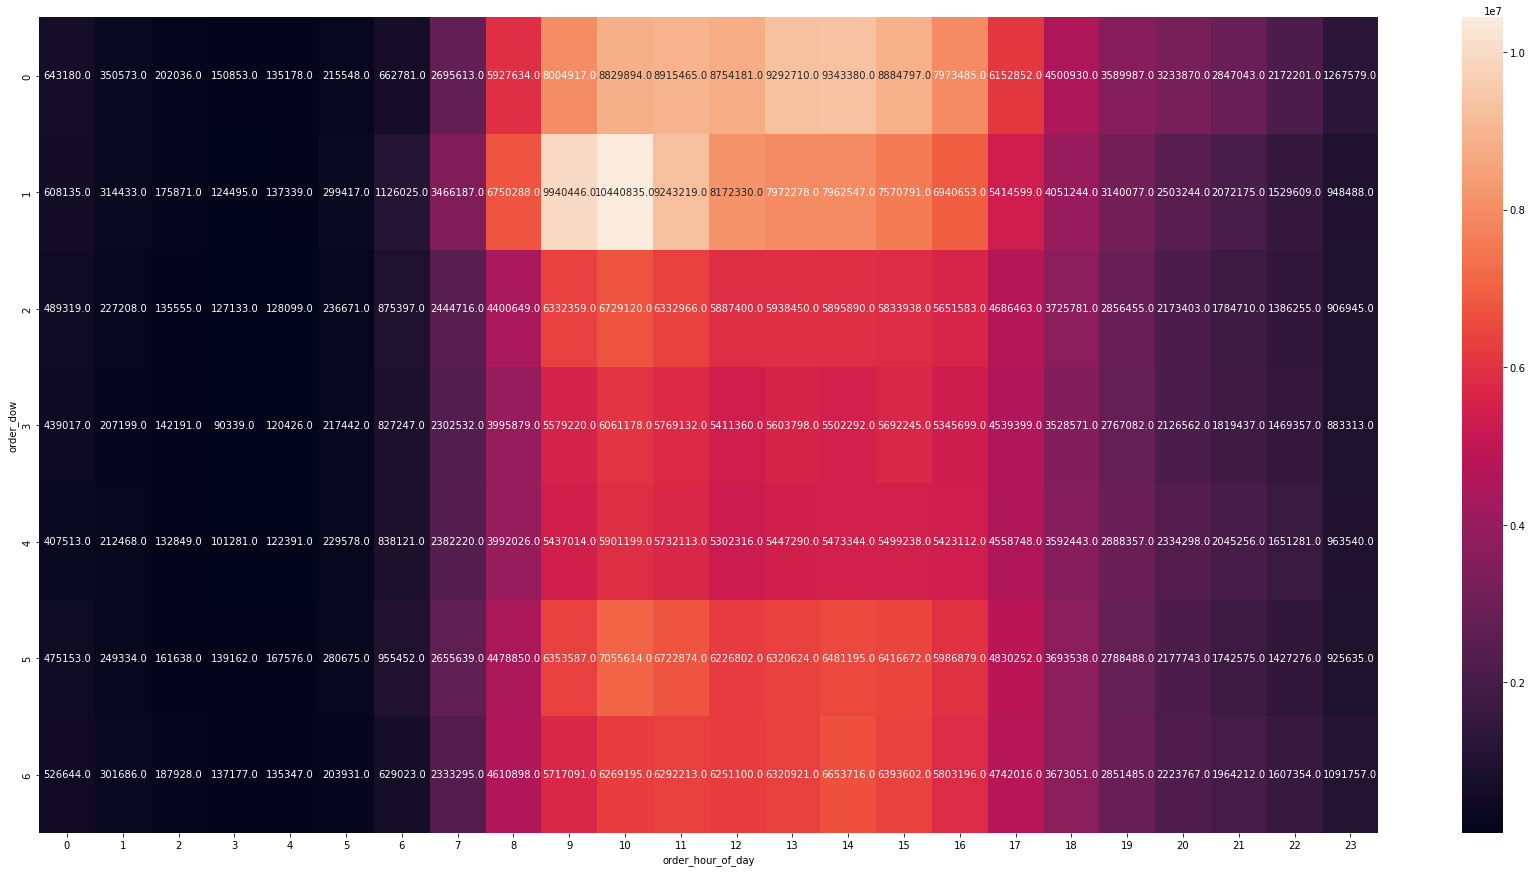

In [50]:
plt.figure(figsize=(30,15))
sns.heatmap(dd1,annot=True,fmt='.1f')
#From the heat map we can infer that most of the oders are placed between 7 am and 5pm

In [51]:
dd2=data.pivot_table(index='order_dow',columns='days_since_prior_order',values='order_number',aggfunc='sum')

<AxesSubplot:xlabel='days_since_prior_order', ylabel='order_dow'>

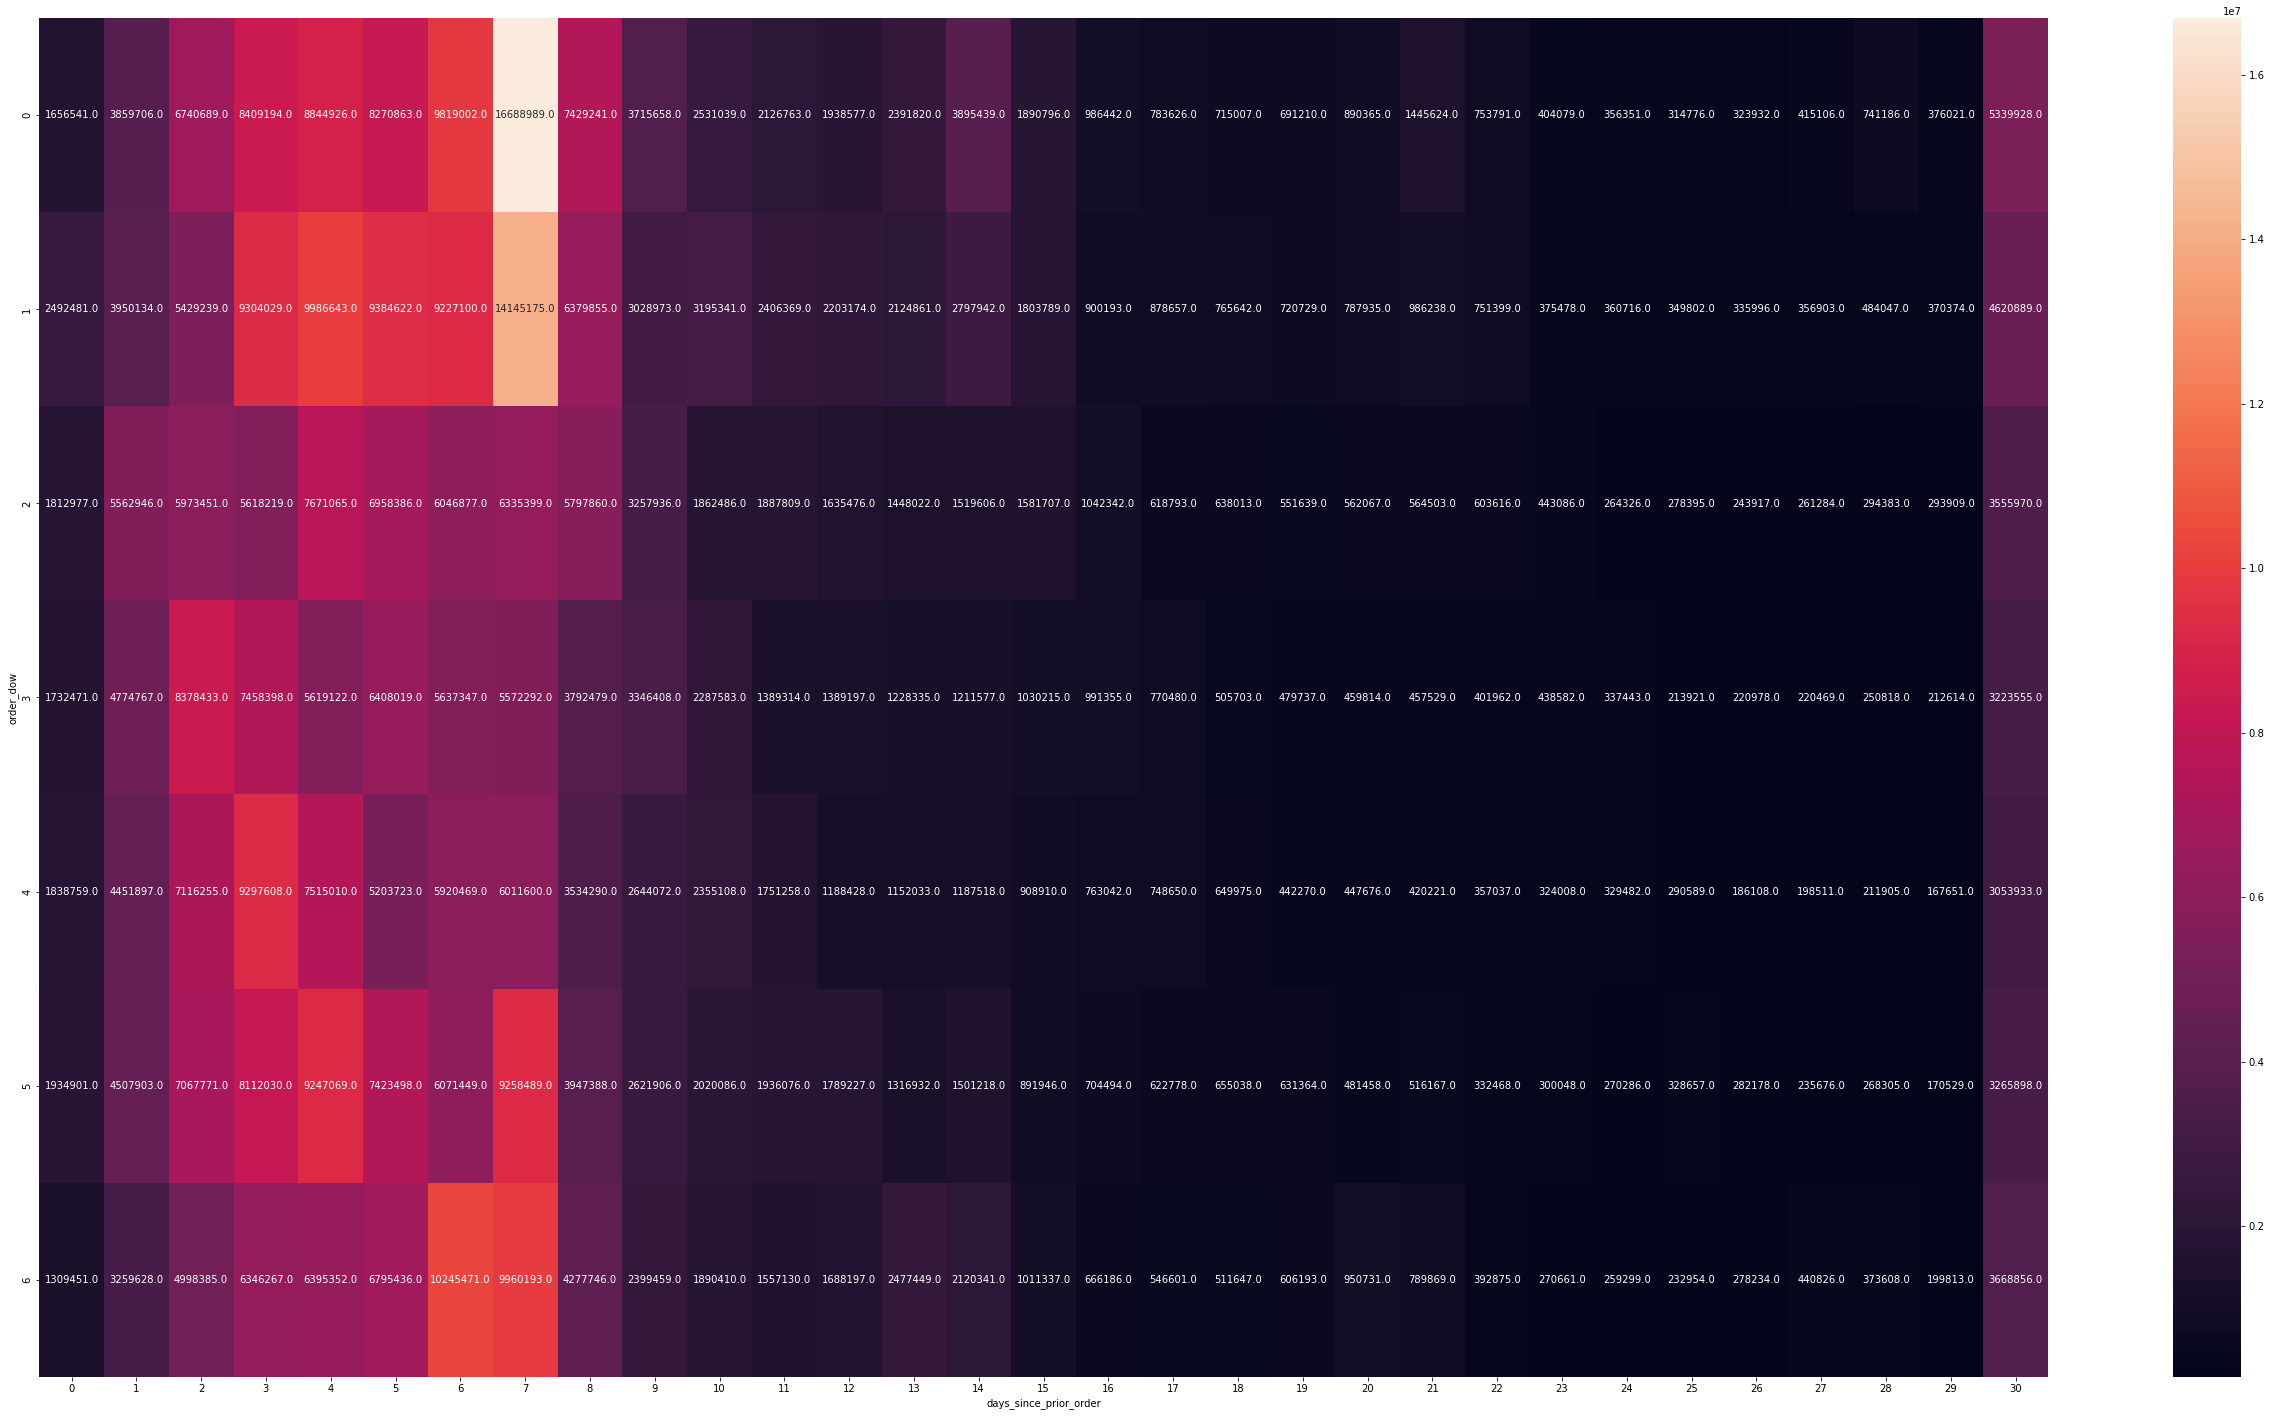

In [54]:
plt.figure(figsize=(45,25))
sns.heatmap(dd2,annot=True,fmt='.1f')
#Re order vs day of the week

In [21]:
df1=data

In [22]:
#To find number of purchase each users has made
df1['user_purchase_count']=df1.groupby('user_id')['user_id'].transform('count')
df1['product_ordered_count']=df1.groupby('product_id')['product_id'].transform('count')

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_purchase', ylabel='Density'>

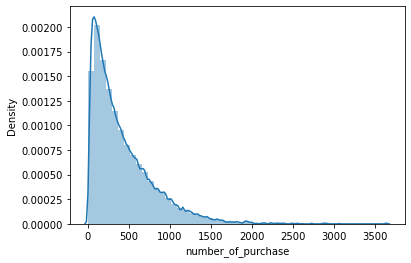

In [45]:
#From this plot we can filter out all the people who has made less than 50 purchase and more than 2.5k purhcase inorder to get a properly distributed data
sns.distplot(df1['number_of_purchase'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_purchase', ylabel='Density'>

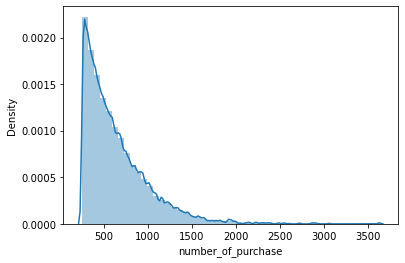

In [53]:
sns.distplot(df1[(df1['number_of_purchase']>250)]['number_of_purchase'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product_ordered_count', ylabel='Density'>

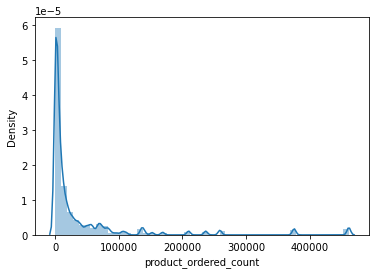

In [62]:
sns.distplot(df1['product_ordered_count'])